# Task 1

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
def merge_csv_on_video_id(directory='.'):
    csv_files = [file for file in os.listdir(directory) if file.startswith('df_') and file.endswith('.csv')]
    
    if not csv_files:
        print("No matching CSV files found.")
        return pd.DataFrame(columns=['Video ID'])

    # Initialize an empty DataFrame for the merged result
    merged_df = None

    for file in csv_files:
        df = pd.read_csv(os.path.join(directory, file))
        
        # Ensure 'Video ID' is in the correct format
        video_id_col = 'Video ID' if 'Video ID' in df.columns else 'video_id'
        df[video_id_col] = df[video_id_col].apply(lambda x: f"{int(x):04d}")
        df.rename(columns={video_id_col: 'Video ID'}, inplace=True)
        
        # Merge the current DataFrame with the accumulated merged_df
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='Video ID', how='outer')

    if merged_df is not None:
        # Sort by 'Video ID' and round numeric columns
        merged_df.sort_values('Video ID', inplace=True)
        numeric_cols = merged_df.select_dtypes(include=['float64', 'float32']).columns.difference(['Video ID'])
        merged_df[numeric_cols] = merged_df[numeric_cols].apply(lambda x: x.round(2))
        # Filter out rows with 'Video ID' above 1000
        merged_df['Video ID'] = merged_df['Video ID'].astype(int)
        merged_df = merged_df[merged_df['Video ID'] <= 1000]
    else:
        merged_df = pd.DataFrame(columns=['Video ID'])

    return merged_df

# Example usage
merged_df = merge_csv_on_video_id()
print(merged_df)

     Video ID  face_confidence  face_area  Max Confidence  \
0           1             0.00          0            0.77   
1           2             0.96        456            1.00   
2           3             0.90        837            1.00   
3           4             0.99        480            1.00   
4           5             1.00        896            1.00   
..        ...              ...        ...             ...   
995       996             0.00          0            1.00   
996       997             0.00          0            0.00   
997       998             0.98        273            1.00   
998       999             1.00       1092            1.00   
999      1000             0.00          0            0.00   

     Keypoints Percentage  Total Area  Average Foreground Pixels  \
0                    0.00        0.00                     1235.0   
1                    1.00    21002.75                    20976.6   
2                    1.00     2234.44                     6169.

In [11]:
# Load the CSV file into a DataFrame
df_activations = pd.read_csv('fmri_activations.csv')

In [12]:
df_activations

,Video ID,V1_avg,V1_max,V2_avg,V2_max,V3_avg,V3_max,V4_avg,V4_max,LOC_avg,LOC_max,EBA_avg,EBA_max,FFA_avg,FFA_max,STS_avg,STS_max,PPA_avg,PPA_max
0,1,-0.127895,1.541335,-0.103223,1.475711,-0.160580,1.733567,-0.266594,1.195146,-0.081984,2.062005,-0.193111,1.520632,-0.133978,1.017327,-0.122359,1.364158,-0.226079,1.338845
1,2,-0.040411,1.588342,-0.030921,1.829308,-0.010214,1.523448,-0.012673,1.486761,0.014027,2.211144,0.142955,2.199897,0.118072,2.128593,0.359539,2.233587,-0.117202,1.445831
2,3,-0.061744,1.512147,-0.050114,1.960235,-0.065295,1.514824,-0.115461,1.326956,0.032131,1.635877,0.075423,1.690437,0.103807,1.593113,0.051225,1.381241,-0.091427,1.325226
3,4,0.053463,1.438515,0.005234,1.725738,0.001025,1.570724,0.093052,1.805057,0.090593,1.913370,0.023595,1.617984,0.010761,1.476313,-0.001505,1.204831,0.211917,2.111883
4,5,0.183659,1.992100,0.197643,1.777519,0.141988,1.642556,0.080502,1.834804,0.091483,2.239369,0.291144,2.291493,0.126973,1.444658,0.111070,1.580341,-0.077466,1.420848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,-0.055583,1.462589,-0.074153,1.461624,-0.005846,1.272071,0.022384,1.689118,0.051841,2.078574,0.137161,1.439346,0.042049,1.558127,0.123988,1.517653,0.049601,1.183570
996,997,-0.005203,1.564042,0.118951,1.735749,0.150530,1.781915,0.164088,1.436167,0.169573,1.983524,0.158701,1.797594,0.279044,1.891109,0.062630,1.446516,0.077881,1.603667
997,998,-0.022364,1.619357,-0.061194,1.303438,-0.068839,1.216196,0.063631,1.592682,-0.206382,1.635314,-0.138784,1.462196,-0.056133,1.125671,0.033523,1.644696,0.036308,1.562576
998,999,0.123652,1.766662,0.087533,2.240236,0.043469,2.048957,-0.030037,1.780237,0.021775,2.404995,0.078369,2.155819,0.230403,2.011131,0.237627,2.148555,0.052419,1.703902


In [13]:
def plot_histograms_with_shared_axes(df):
    """
    This function iterates through all columns of a DataFrame, excluding "Video ID",
    and plots the distribution of each column using a histogram. Columns ending with
    '_avg' and '_max' will have shared x-axis ranges respectively.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the data to plot.
    
    Returns:
    None: The function directly plots the histograms.
    """
    # Identifying columns for max and avg
    max_columns = [col for col in df.columns if col.endswith('_max')]
    avg_columns = [col for col in df.columns if col.endswith('_avg')]
    
    # Calculating global min and max for max and avg columns
    max_range = (min(df[max_columns].min()), max(df[max_columns].max())) if max_columns else (0, 1)
    avg_range = (min(df[avg_columns].min()), max(df[avg_columns].max())) if avg_columns else (0, 1)
    
    # Setting up the figure size and layout
    plt.figure(figsize=(12, len(df.columns) * 3))
    
    # Plotting histograms for max columns with shared x-axis
    for i, column in enumerate(max_columns, start=1):
        plt.subplot(len(df.columns), 1, i)
        df[column].hist(bins=20, edgecolor='k', range=max_range)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    # Plotting histograms for avg columns with shared x-axis
    for i, column in enumerate(avg_columns, start=len(max_columns) + 1):
        plt.subplot(len(df.columns), 1, i)
        df[column].hist(bins=20, edgecolor='k', range=avg_range)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

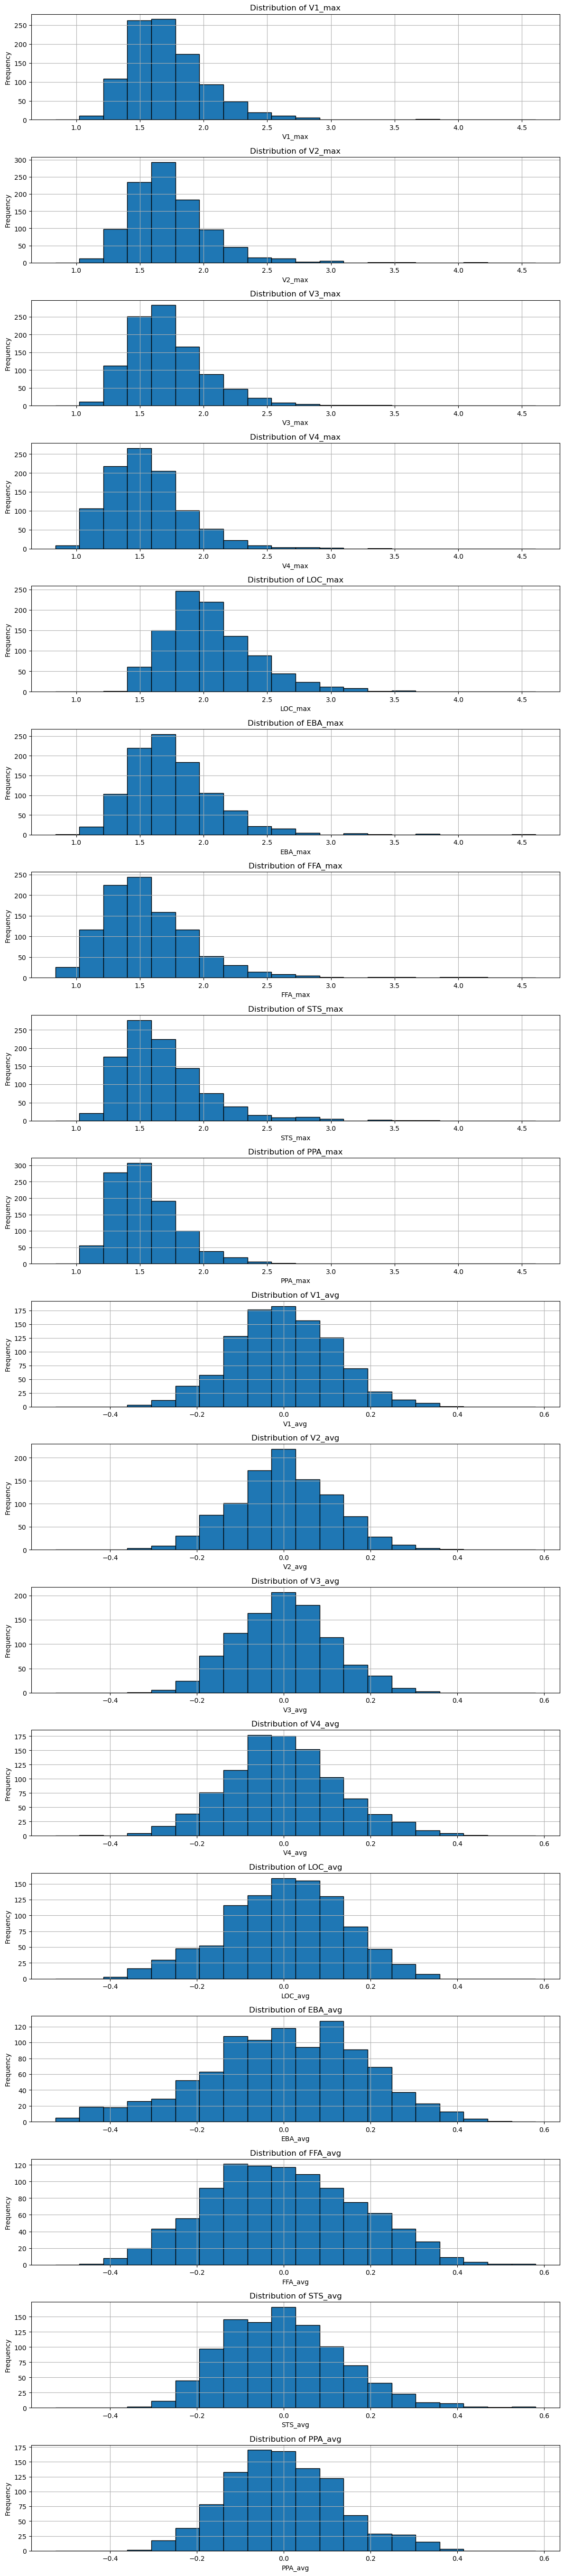

In [14]:
plot_histograms_with_shared_axes(df_activations)

In [15]:
merged_df

,Video ID,face_confidence,face_area,Max Confidence,Keypoints Percentage,Total Area,Average Foreground Pixels,Average Background Percentage
0,1,0.00,0,0.77,0.00,0.00,1235.0,97.54
1,2,0.96,456,1.00,1.00,21002.75,20976.6,58.19
2,3,0.90,837,1.00,1.00,2234.44,6169.6,87.70
3,4,0.99,480,1.00,0.83,6342.40,3856.6,92.31
4,5,1.00,896,1.00,0.83,70773.21,34521.4,31.20
...,...,...,...,...,...,...,...,...
995,996,0.00,0,1.00,0.75,14524.07,7562.4,84.93
996,997,0.00,0,0.00,0.00,0.00,19925.8,60.29
997,998,0.98,273,1.00,1.00,2272.44,5141.8,89.75
998,999,1.00,1092,1.00,0.67,14607.87,26435.8,47.31


In [16]:
import matplotlib.pyplot as plt

def plot_histograms(df):
    """
    Plots histograms for all columns in the dataframe except 'Video ID'.
    Each column's distribution is visualized in a separate histogram.
    
    Args:
    - df: Pandas DataFrame containing the data.
    """
    # Filter out 'Video ID' column
    columns_to_plot = df.columns[df.columns != 'Video ID']
    
    # Determine the number of rows needed for subplots
    n_rows = len(columns_to_plot)
    
    plt.figure(figsize=(10, 5 * n_rows))  # Adjust the figure size as necessary
    
    for i, column in enumerate(columns_to_plot, 1):
        ax = plt.subplot(n_rows, 1, i)
        df[column].hist(bins=20, edgecolor='k', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



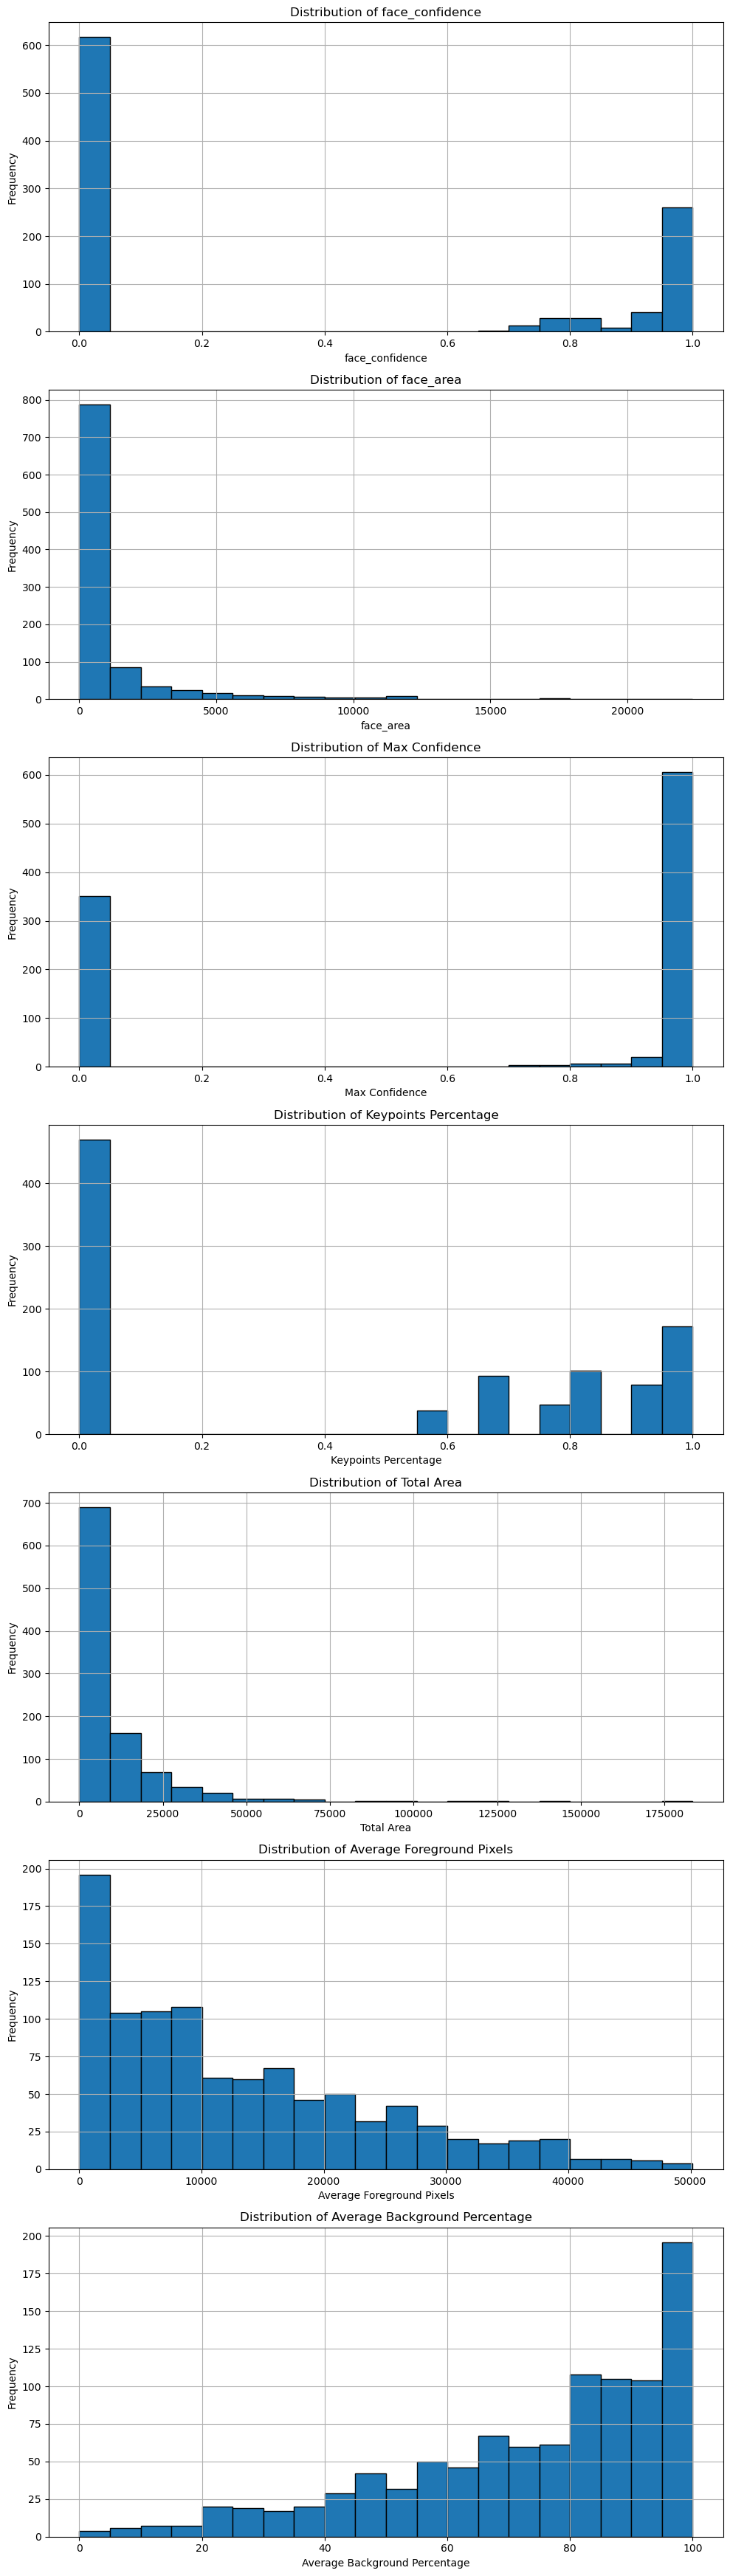

In [17]:
plot_histograms(merged_df)

In [18]:
def plot_correlation_heatmap(df):
    """
    Plots a heatmap of the correlation matrix for all columns in the dataframe except 'Video ID'.
    
    Args:
    - df: Pandas DataFrame containing the data.
    """
    # Exclude 'Video ID' from the correlation matrix
    corr_matrix = df.drop('Video ID', axis=1).corr()
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 8))  # Adjust figure size as necessary
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                cbar_kws={"shrink": .5}, linewidths=.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

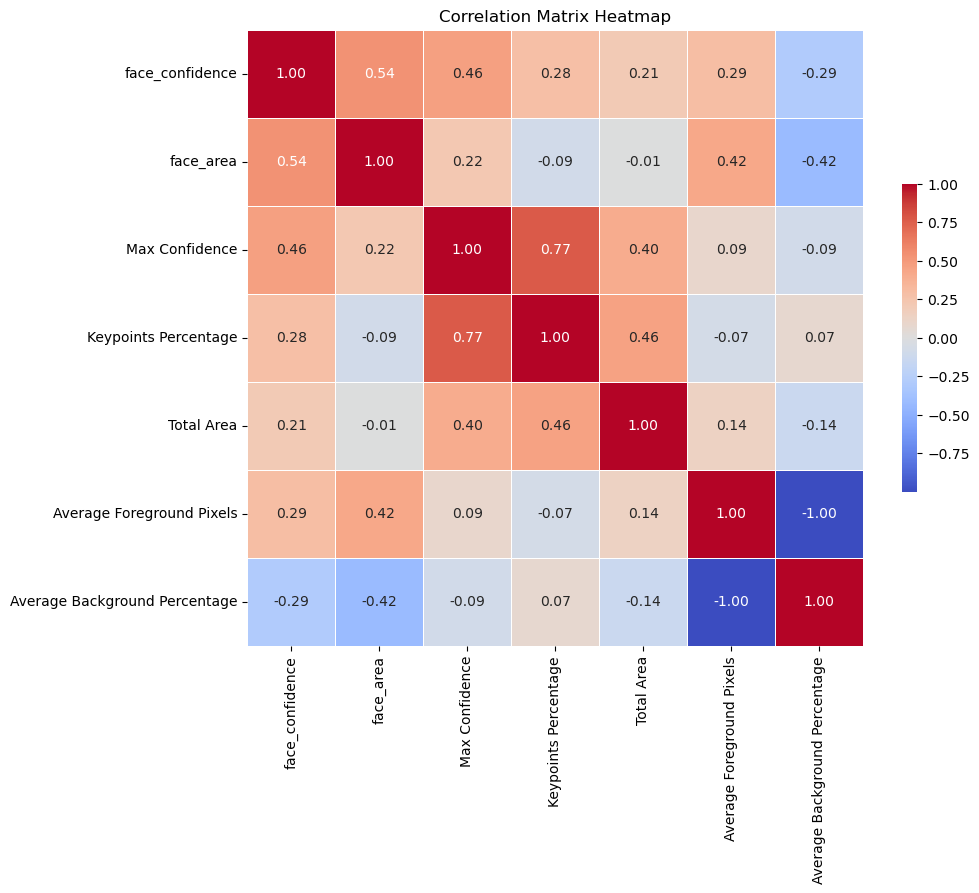

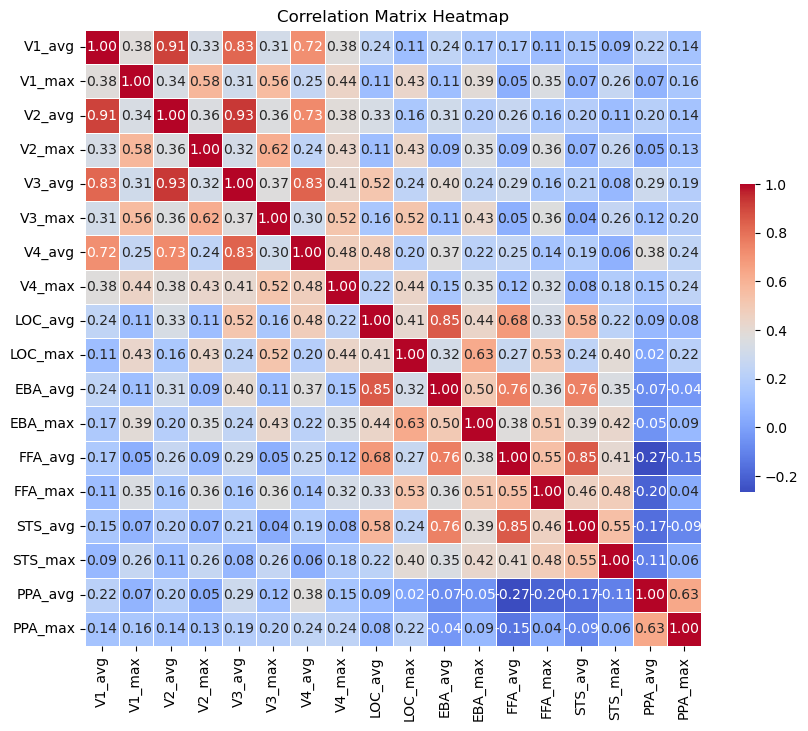

In [19]:
plot_correlation_heatmap(merged_df)
plot_correlation_heatmap(df_activations)

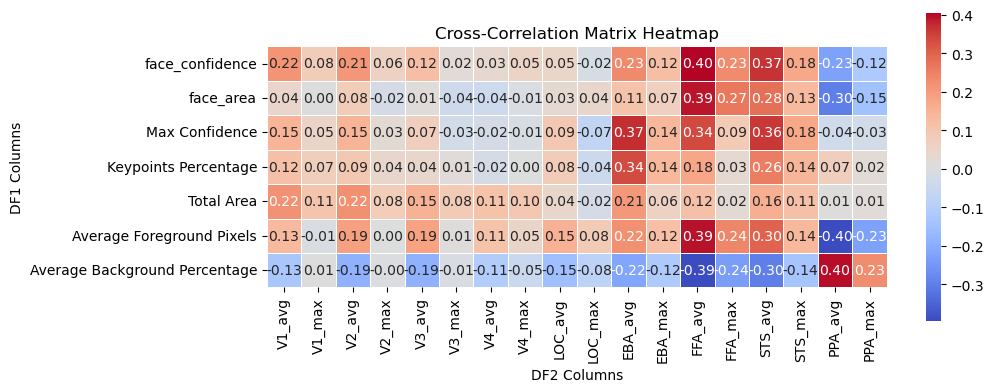

In [20]:
def cross_correlation_heatmap(df1, df2):
    """
    Computes the correlation between each column in df1 with each column in df2 and plots a heatmap.
    
    Args:
    - df1: Pandas DataFrame containing the first set of data.
    - df2: Pandas DataFrame containing the second set of data.
    """
    # Ensure df1 and df2 only contain numeric columns and exclude 'Video ID'
    df1_numeric = df1.select_dtypes(include=['number']).drop(columns=['Video ID'], errors='ignore')
    df2_numeric = df2.select_dtypes(include=['number']).drop(columns=['Video ID'], errors='ignore')
    
    # Initialize an empty DataFrame to store correlations
    corr_matrix = pd.DataFrame(index=df1_numeric.columns, columns=df2_numeric.columns)
    
    # Compute correlation between each column in df1 and each column in df2
    for col1 in df1_numeric.columns:
        for col2 in df2_numeric.columns:
            corr_matrix.at[col1, col2] = df1_numeric[col1].corr(df2_numeric[col2])
    
    # Convert correlation matrix to numeric type for plotting
    corr_matrix = corr_matrix.astype(float)
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 8))  # Adjust figure size as necessary
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                cbar_kws={"shrink": .5}, linewidths=.5)
    plt.title('Cross-Correlation Matrix Heatmap')
    plt.ylabel('DF1 Columns')
    plt.xlabel('DF2 Columns')
    plt.show()


cross_correlation_heatmap(merged_df, df_activations)

## Task 1

In [21]:
# Load the CSV file into a DataFrame
Max_Avg_activation_df = pd.read_csv('Max_Avg_activation_df.csv')

In [22]:
plot_histograms_with_shared_axes(Max_Avg_activation_df)

<Figure size 1200x3300 with 0 Axes>

In [23]:
Max_Avg_activation_df

,Video ID,Max_stage_1,Max_stage_2,Max_stage_3,Max_stage_4,Max_stage_5,Avg_stage_1,Avg_stage_2,Avg_stage_3,Avg_stage_4,Avg_stage_5
0,1,14.545163,11.809052,16.061022,16.878065,47.903866,1.745670,0.890726,0.679731,0.445761,0.421600
1,2,20.415741,15.007153,20.576262,15.931850,49.971886,1.912086,0.922130,0.803129,0.512637,0.479629
2,3,15.611925,12.609974,20.428215,22.058247,50.575844,1.734454,0.875966,0.732907,0.502426,0.523094
3,4,15.556086,13.859653,24.354866,17.511906,61.973620,1.844831,0.925304,0.731250,0.490984,0.546825
4,5,15.844516,13.835959,23.334328,18.532757,52.692085,1.991118,0.961383,0.871049,0.544432,0.577239
...,...,...,...,...,...,...,...,...,...,...,...
995,996,13.645198,13.658531,15.661921,16.996231,149.179020,1.925227,0.993797,0.841951,0.523797,0.647188
996,997,12.435348,16.156786,20.964090,21.361778,64.398445,1.686295,0.929842,0.733680,0.510106,0.516910
997,998,18.310453,16.909615,20.465515,16.294937,44.455430,2.079767,1.002780,0.877120,0.529636,0.431410
998,999,19.064869,15.620210,17.326840,18.813034,62.987823,2.087402,0.977695,0.874859,0.536381,0.577625


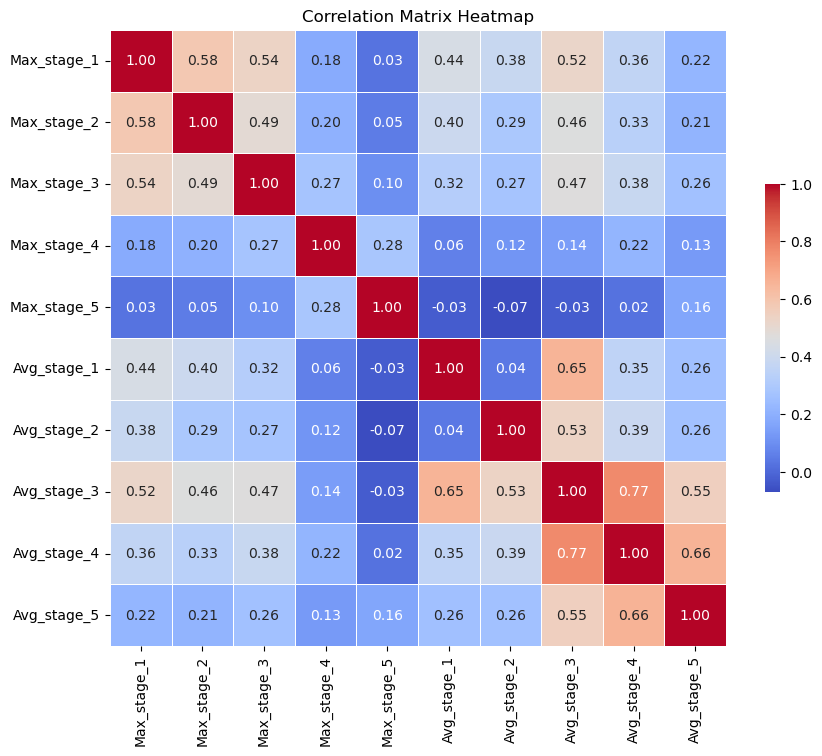

In [25]:
plot_correlation_heatmap(Max_Avg_activation_df)

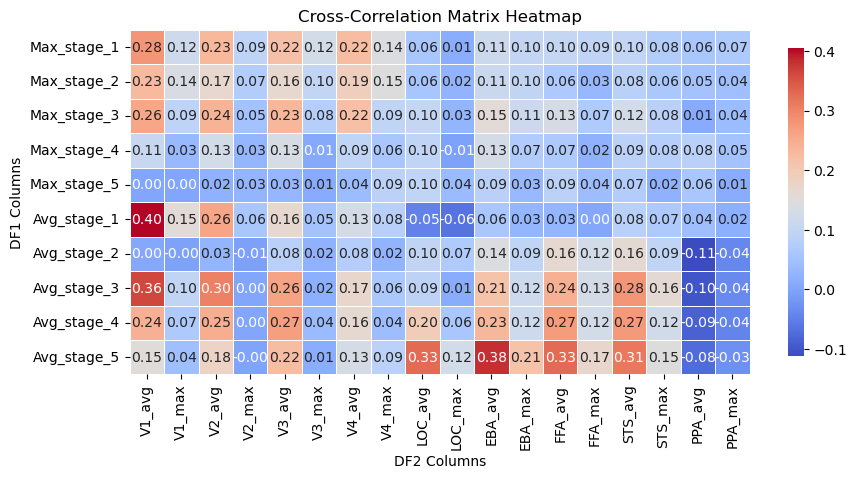

In [24]:
cross_correlation_heatmap(Max_Avg_activation_df, df_activations)